In [21]:
import matplotlib as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
import numpy as np
import pickle

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array , load_img


In [23]:
#data_dir = r"C:\SIH\Test123"
data_dir = r"D:\SHP College Work\Type 3\Dataset"

In [25]:
img_height,img_width=400,400
batch_size=32
train_ds,val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_height , img_width),
    batch_size=batch_size)


Found 2355 files belonging to 5 classes.
Using 1884 files for training.
Using 471 files for validation.


In [26]:
# val_ds=tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.2,
#     subset="validation",
#     seed=123,
#     image_size=(img_height , img_width),
#     batch_size=batch_size)



In [29]:
class_names=train_ds.class_names
print(class_names)


['Crape_Jasmine', 'Curry', 'Guava', 'Lemon', 'Mango']


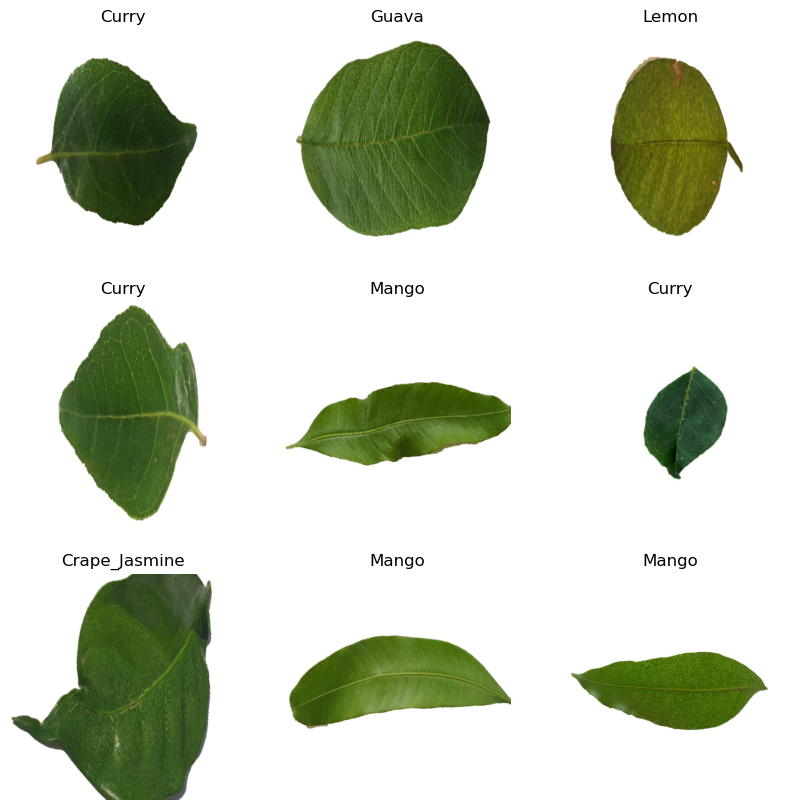

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [32]:

num_classes=32

model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height,img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D( ) ,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes,activation= 'softmax' )
])


In [33]:

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])



In [34]:
epochs=10
history = model.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=epochs
)


Epoch 1/10
59/59 [==============================] - 84s 1s/step - loss: 1.1542 - accuracy: 0.6046 - val_loss: 0.2812 - val_accuracy: 0.9108
Epoch 2/10
59/59 [==============================] - 77s 1s/step - loss: 0.1842 - accuracy: 0.9315 - val_loss: 0.1499 - val_accuracy: 0.9469
Epoch 3/10
59/59 [==============================] - 84s 1s/step - loss: 0.0769 - accuracy: 0.9766 - val_loss: 0.0748 - val_accuracy: 0.9745
Epoch 4/10
59/59 [==============================] - 82s 1s/step - loss: 0.0517 - accuracy: 0.9846 - val_loss: 0.1078 - val_accuracy: 0.9660
Epoch 5/10
59/59 [==============================] - 81s 1s/step - loss: 0.0193 - accuracy: 0.9952 - val_loss: 0.0566 - val_accuracy: 0.9766
Epoch 6/10
59/59 [==============================] - 84s 1s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0518 - val_accuracy: 0.9851
Epoch 7/10
59/59 [==============================] - 85s 1s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 0.9873
Epoch 8/10
59/59 [==

In [39]:
model.save("_model.h5")

In [53]:
from tensorflow.keras.models import load_model
model = load_model('_model.h5')

In [55]:
import os
import sys
import pickle

projectabspathname = os.path.abspath('projectname.pickle')
print(projectabspathname)
projectname = 'projectname.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()

C:\Users\Admin\SIH_PlantI-dentification\projectname.pickle


In [57]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return {"error": "Failed to load the image"}
    img_resize = cv2.resize(img, (400, 400))
    img_3d = img_resize.reshape(-1, 400, 400, 3)
    predictions = model.predict(img_3d)[0]
    class_index = tf.argmax(predictions).numpy()
    class_name = class_names[class_index]
    prediction_value = float(predictions[class_index])
    return {"class_index": class_index, "class_name": class_name, "prediction_value": prediction_value}


In [59]:
result = predict_image(r"D:\SHP College Work\Type 3\Testing\C\__0_7530590.png")
print(result)



1/1 [==============================] - 0s 290ms/step
{'class_index': 1, 'class_name': 'Curry', 'prediction_value': 0.999998927116394}


In [51]:
pip install gradio


     ---------------------------------------- 57.1/57.1 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 73.2/73.2 kB ? eta 0:00:00
     ---------------------------------------- 9.5/9.5 MB 13.5 MB/s eta 0:00:00
     -------------------------------------- 136.4/136.4 kB 7.9 MB/s eta 0:00:00
     ------------------------------------- 320.1/320.1 kB 10.0 MB/s eta 0:00:00
     ---------------------------------------- 63.7/63.7 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 94.9/94.9 kB 5.3 MB/s eta 0:00:00
     ------------------------------------- 447.5/447.5 kB 13.7 MB/s eta 0:00:00
     ---------------------------------------- 44.7/44.7 kB ? eta 0:00:00
     ---------------------------------------- 125.0/125.0 kB ? eta 0:00:00
     ------------------------------------- 179.6/179.6 kB 10.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd

if "error" not in result:
    class_index = result["class_index"]
    
    
    df = pd.read_excel("C:\SIH\Dataset.xlsm")

    
    row = df[df['Index'] == class_index+1]

    if not row.empty:
        index = row['Index'].values[0]
        plant_name = row['Plant name'].values[0]
        scientific_name = row['Scientific name'].values[0]
        common_regions = row['Common growth/cultivation regions'].values[0]
        physical_appearance = row['Physical appearance'].values[0]
        chemical_composition = row['Chemical composition'].values[0]
        medicinal_uses=row['Medicinal uses'].values[0]

        print(f"Index: {index}")
        print(f"Plant name: {plant_name}")
        print(f"Scientific name: {scientific_name}")
        print(f"Common growth/cultivation regions: {common_regions}")
        print(f"Physical appearance: {physical_appearance}")
        print(f"Chemical composition: {chemical_composition}")
        print(f"Medicinal uses:{medicinal_uses}")
    else:
        print(f"No data found for Index {class_index}")
else:
    print(result["error"])

Index: 5
Plant name: Mango leaf
Scientific name: Mangifera indica
Common growth/cultivation regions: Tropical and sub-tropical climates
Physical appearance: The tree is evergreen, often reaching 50–60 feet in height and attaining great age. The simple leaves are lanceolate, up to 30 cm (12 inches) long.
Chemical composition: Mangiferin, followed by phenolic acids, benzophenones, and other antioxidants such as flavonoids, ascorbic acid, carotenoids, and tocopherols
Medicinal uses:Antibacterial properties that help treat bacterial skin infections such as staph Infections and skin burns


In [13]:
print(f"class_index: {class_index}")
print(f"Unique Index values in Excel: {df['Index'].unique()}")


class_index: 1
Unique Index values in Excel: [1 2 3 4 5]
